In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("onlinefraud.csv")

In [3]:
data = data.drop(['step','isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)

In [4]:
data = pd.get_dummies(data, columns=['type'])

In [5]:
X = data.drop(columns=['isFraud'])
y = data['isFraud']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [8]:
y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [9]:
print("Accuracy: ", accuracy)
print("Report: ", report)
print("Confusion Matrix: ", conf_matrix)

Accuracy:  0.9991410771034573
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.33      0.50      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.67      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:  [[1270893      11]
 [   1082     538]]


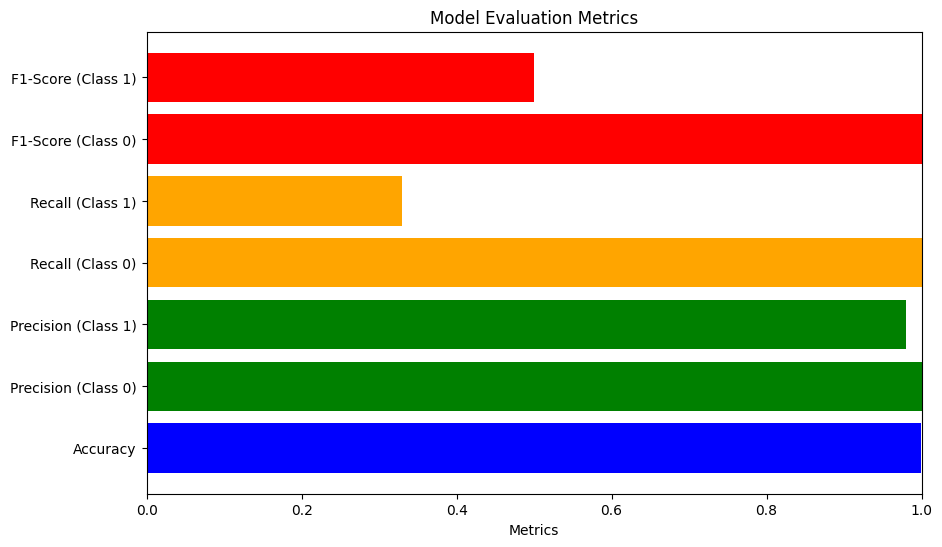

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace these with your actual values)
accuracy = 0.9991
precision_class0 = 1.0
precision_class1 = 0.98
recall_class0 = 1.0
recall_class1 = 0.33
f1_score_class0 = 1.0
f1_score_class1 = 0.5

# Categories for the bar chart
categories = ['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)',
              'Recall (Class 0)', 'Recall (Class 1)', 'F1-Score (Class 0)', 'F1-Score (Class 1)']

# Values for the bar chart
values = [accuracy, precision_class0, precision_class1,
          recall_class0, recall_class1, f1_score_class0, f1_score_class1]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(categories, values, color=['blue', 'green', 'green', 'orange', 'orange', 'red', 'red'])
plt.xlabel('Metrics')
plt.title('Model Evaluation Metrics')
plt.xlim(0, 1)  # Set x-axis limit to represent probabilities
plt.show()
